## Programming Assignment 3

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from miscs import helpers

In [2]:
torch.manual_seed(1)
%matplotlib inline
%reload_ext autoreload
%autoreload 2

input_dim = 1 * 28 * 28
output_dim = 10
batch_size = 50
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# data loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)

train_size = 50000
valid_size = 10000

trainset, validset = torch.utils.data.random_split(trainset, [train_size, valid_size])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
validloader = torch.utils.data.DataLoader(validset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


# model definition
class MLP(nn.Module):
    def __init__(self, input_dim, hiddens, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.fc1 = nn.Linear(input_dim, hiddens[0])
        self.fc2 = nn.Linear(hiddens[0], hiddens[1])
        self.fc3 = nn.Linear(hiddens[1], output_dim)

        self.dropout_x = torch.nn.Dropout(0.2)
        self.dropout1 = torch.nn.Dropout(0.5)
        self.dropout2 = torch.nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, self.input_dim)
        x = self.dropout_x(x)

        a1 = nn.ReLU()(self.fc1(x))
        a1 = self.dropout1(a1)

        a2 = nn.ReLU()(self.fc2(a1))
        a2 = self.dropout2(a2)

        out = self.fc3(a2)
        return out

In [3]:
epochs = 10
lr = 1e-3

### MLP I: No Regularization, SGD

In [4]:
model_mlp1 = MLP(input_dim, [800, 800], output_dim)

optimizer = optim.SGD(model_mlp1.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
mlp1_tr_epoch_losses, mlp1_tr_iter_losses, mlp1_val_epoch_losses, mlp1_val_epoch_accs = \
    helpers.train(trainloader, model_mlp1, optimizer, criterion, device, epochs, validloader, l1_reg=0, l2_reg=0)

mlp1_train_acc = helpers.test(trainloader, model_mlp1, criterion, device)[0]
mlp1_valid_acc = helpers.test(validloader, model_mlp1, criterion, device)[0]
mlp1_test_acc = helpers.test(testloader, model_mlp1, criterion, device)[0]

print("Accuracy on train set: {:.3f}, valid set: {:.3f}, test set: {:.3f}".format(mlp1_train_acc, mlp1_valid_acc, mlp1_test_acc))

Epoch: [1/10], total iters: 1000, loss: 2.11165, time: 12.67239 sec.
Epoch: [2/10], total iters: 2000, loss: 1.32579, time: 11.67254 sec.
Epoch: [3/10], total iters: 3000, loss: 0.73762, time: 11.59527 sec.
Epoch: [4/10], total iters: 4000, loss: 0.53924, time: 11.68765 sec.
Epoch: [5/10], total iters: 5000, loss: 0.45241, time: 11.72221 sec.
Epoch: [6/10], total iters: 6000, loss: 0.40424, time: 11.68826 sec.
Epoch: [7/10], total iters: 7000, loss: 0.37337, time: 11.64106 sec.
Epoch: [8/10], total iters: 8000, loss: 0.35148, time: 11.65779 sec.
Epoch: [9/10], total iters: 9000, loss: 0.33478, time: 11.73658 sec.
Epoch: [10/10], total iters: 10000, loss: 0.32131, time: 11.70349 sec.
Accuracy on train set: 90.996, valid set: 90.910, test set: 91.420


### MLP II: No Regularization, Nesterov

In [5]:
model_mlp2 = MLP(input_dim, [800, 800], output_dim)

optimizer = optim.SGD(model_mlp2.parameters(), lr=lr, momentum=0.9, nesterov=True)
criterion = nn.CrossEntropyLoss()
mlp2_tr_epoch_losses, mlp2_tr_iter_losses, mlp2_val_epoch_losses, mlp2_val_epoch_accs = \
    helpers.train(trainloader, model_mlp2, optimizer, criterion, device, epochs, validloader, l1_reg=0, l2_reg=0)

mlp2_train_acc = helpers.test(trainloader, model_mlp2, criterion, device)[0]
mlp2_valid_acc = helpers.test(validloader, model_mlp2, criterion, device)[0]
mlp2_test_acc = helpers.test(testloader, model_mlp2, criterion, device)[0]

print("Accuracy on train set: {:.3f}, valid set: {:.3f}, test set: {:.3f}".format(mlp2_train_acc, mlp2_valid_acc, mlp2_test_acc))

Epoch: [1/10], total iters: 1000, loss: 0.89129, time: 13.29746 sec.
Epoch: [2/10], total iters: 2000, loss: 0.28780, time: 12.54842 sec.
Epoch: [3/10], total iters: 3000, loss: 0.22209, time: 12.45384 sec.
Epoch: [4/10], total iters: 4000, loss: 0.18204, time: 12.46927 sec.
Epoch: [5/10], total iters: 5000, loss: 0.15395, time: 12.43828 sec.
Epoch: [6/10], total iters: 6000, loss: 0.13298, time: 12.42251 sec.
Epoch: [7/10], total iters: 7000, loss: 0.11700, time: 12.48600 sec.
Epoch: [8/10], total iters: 8000, loss: 0.10356, time: 12.43786 sec.
Epoch: [9/10], total iters: 9000, loss: 0.09290, time: 12.51641 sec.
Epoch: [10/10], total iters: 10000, loss: 0.08328, time: 12.39112 sec.
Accuracy on train set: 97.946, valid set: 96.890, test set: 96.930


### MLP III: L1, Nesterov

In [6]:
model_mlp3 = MLP(input_dim, [800, 800], output_dim)

optimizer = optim.SGD(model_mlp3.parameters(), lr=lr, momentum=0.9, nesterov=True)
criterion = nn.CrossEntropyLoss()
mlp3_tr_epoch_losses, mlp3_tr_iter_losses, mlp3_val_epoch_losses, mlp3_val_epoch_accs = \
    helpers.train(trainloader, model_mlp3, optimizer, criterion, device, epochs, validloader, l1_reg=0.001, l2_reg=0)

mlp3_train_acc = helpers.test(trainloader, model_mlp3, criterion, device)[0]
mlp3_valid_acc = helpers.test(validloader, model_mlp3, criterion, device)[0]
mlp3_test_acc = helpers.test(testloader, model_mlp3, criterion, device)[0]

print("Accuracy on train set: {:.3f}, valid set: {:.3f}, test set: {:.3f}".format(mlp3_train_acc, mlp3_valid_acc, mlp3_test_acc))

Epoch: [1/10], total iters: 1000, loss: 0.97582, time: 13.31309 sec.
Epoch: [2/10], total iters: 2000, loss: 0.43212, time: 12.50069 sec.
Epoch: [3/10], total iters: 3000, loss: 0.46745, time: 12.45353 sec.
Epoch: [4/10], total iters: 4000, loss: 0.45444, time: 12.54736 sec.
Epoch: [5/10], total iters: 5000, loss: 0.38723, time: 12.54295 sec.
Epoch: [6/10], total iters: 6000, loss: 0.34074, time: 12.48609 sec.
Epoch: [7/10], total iters: 7000, loss: 0.31225, time: 12.48503 sec.
Epoch: [8/10], total iters: 8000, loss: 0.29417, time: 12.43829 sec.
Epoch: [9/10], total iters: 9000, loss: 0.28085, time: 12.42219 sec.
Epoch: [10/10], total iters: 10000, loss: 0.27102, time: 12.50556 sec.
Accuracy on train set: 92.698, valid set: 92.630, test set: 92.620


### MLP IV: L2, Nesterov

In [7]:
model_mlp4 = MLP(input_dim, [800, 800], output_dim)

optimizer = optim.SGD(model_mlp4.parameters(), lr=lr, momentum=0.9, nesterov=True)
criterion = nn.CrossEntropyLoss()
mlp4_tr_epoch_losses, mlp4_tr_iter_losses, mlp4_val_epoch_losses, mlp4_val_epoch_accs = \
    helpers.train(trainloader, model_mlp4, optimizer, criterion, device, epochs, validloader, l1_reg=0, l2_reg=0.001)

mlp4_train_acc = helpers.test(trainloader, model_mlp4, criterion, device)[0]
mlp4_valid_acc = helpers.test(validloader, model_mlp4, criterion, device)[0]
mlp4_test_acc = helpers.test(testloader, model_mlp4, criterion, device)[0]

print("Accuracy on train set: {:.3f}, valid set: {:.3f}, test set: {:.3f}".format(mlp4_train_acc, mlp4_valid_acc, mlp4_test_acc))

Epoch: [1/10], total iters: 1000, loss: 0.92119, time: 13.29827 sec.
Epoch: [2/10], total iters: 2000, loss: 0.29544, time: 12.49262 sec.
Epoch: [3/10], total iters: 3000, loss: 0.23006, time: 12.46926 sec.
Epoch: [4/10], total iters: 4000, loss: 0.19034, time: 12.46959 sec.
Epoch: [5/10], total iters: 5000, loss: 0.16182, time: 12.43796 sec.
Epoch: [6/10], total iters: 6000, loss: 0.14110, time: 12.50158 sec.
Epoch: [7/10], total iters: 7000, loss: 0.12393, time: 12.48559 sec.
Epoch: [8/10], total iters: 8000, loss: 0.11107, time: 12.52910 sec.
Epoch: [9/10], total iters: 9000, loss: 0.09984, time: 12.56302 sec.
Epoch: [10/10], total iters: 10000, loss: 0.09064, time: 12.51004 sec.
Accuracy on train set: 97.844, valid set: 96.790, test set: 96.990


### Training Loss vs Iteration

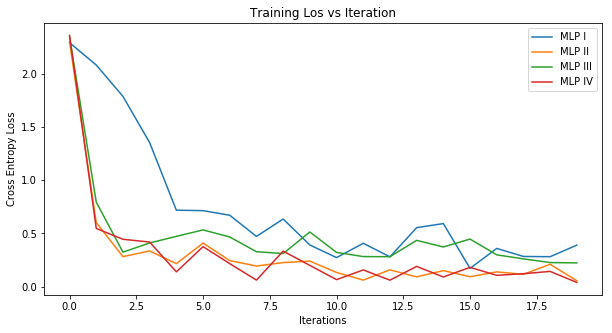

In [8]:
plt.figure(figsize=(10,5))

# plot every 500th iteration
step = 500
plt.plot(mlp1_tr_iter_losses[0::step], label='MLP I')
plt.plot(mlp2_tr_iter_losses[0::step], label='MLP II')
plt.plot(mlp3_tr_iter_losses[0::step], label='MLP III')
plt.plot(mlp4_tr_iter_losses[0::step], label='MLP IV')

plt.title("Training Los vs Iteration")
plt.xlabel("Iterations")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.show()

### Validation Accuracy vs Epoch

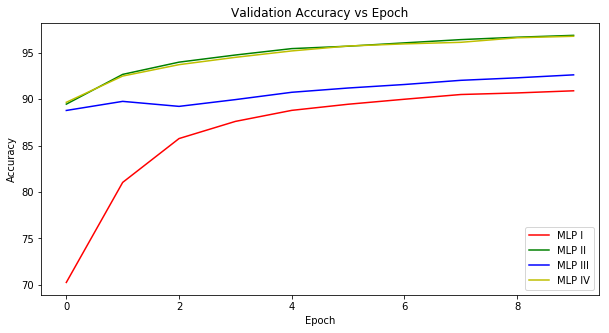

In [9]:
plt.figure(figsize=(10,5))

plt.plot(mlp1_val_epoch_accs, label='MLP I', c='r')
plt.plot(mlp2_val_epoch_accs, label='MLP II', c='g')
plt.plot(mlp3_val_epoch_accs, label='MLP III', c='b')
plt.plot(mlp4_val_epoch_accs, label='MLP IV', c='y')

plt.title("Validation Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Accuracies on Test Set

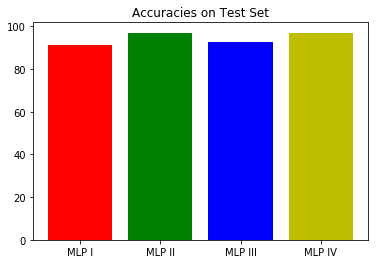

In [10]:
accs = [mlp1_test_acc, mlp2_test_acc, mlp3_test_acc, mlp4_test_acc]
plt.title("Accuracies on Test Set")
plt.bar(['MLP I', 'MLP II', 'MLP III', 'MLP IV'], accs, color='rgby')
plt.show()